# Data Mining (station BETN073)

### Read plain txt file to dataframe
Data is being read from disk as CSV file.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

fname = "AirBase_BE_v7/BETN073/BETN0730000700100dymax.1-1-1990.31-12-2011"

columnNames = ['month']
for i in range(1,32):  # First column is month-day, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))

df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])

### Make empty daily TS from 1-1-1990 to 31-12-2011
Make an empty multi-variate time-series frame.

In [74]:
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3', 'Var1'])
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))

Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00


### Fill empty ts with (valid only) O3 data (Nans in invalid readings)
Copy all valid ozone data to the time-series.

In [75]:
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, 'O3'] = row[columnIndex] # Set value to time-series
#                 print("date: {}, currentDate: {}, columnIndex: {}, value: {}, validity: {}"
#                       .format(date, currentDate, columnIndex, row[columnIndex], row[columnIndex + 1]))                

### First month data (for comparing data validity in time-series)
Compare CSV vs time-series validity for the first month.

In [76]:
# First 31 days of CSV data
df1.head(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
0,1990-01-01,48.714,0,7.0,0,34.333,0,12.714,1,14.5,...,77.5,1,81.286,1,62.875,1,60.667,1,65.5,1


In [77]:
# First 31 days of time-series data
ts.head(31)

,O3,Var1
1990-01-01,NaN,NaN
1990-01-02,NaN,NaN
1990-01-03,NaN,NaN
1990-01-04,12.714,NaN
1990-01-05,14.500,NaN
1990-01-06,23.143,NaN
1990-01-07,NaN,NaN
1990-01-08,20.625,NaN
1990-01-09,36.750,NaN
1990-01-10,54.571,NaN


### Last month data (for comparing data validity in time-series)
Compare CSV vs time-series validity for the last month.

In [78]:
# Last 31 days of CSV data
df1.tail(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
263,2011-12-01,37.5,1,49.875,1,50.062,1,56.857,1,58.312,...,52.375,1,39.0,1,57.357,0,61.938,1,40.786,1


In [79]:
# Last 31 days of time-series data
ts.tail(31)

,O3,Var1
2011-12-01,37.500,NaN
2011-12-02,49.875,NaN
2011-12-03,50.062,NaN
2011-12-04,56.857,NaN
2011-12-05,58.312,NaN
2011-12-06,52.500,NaN
2011-12-07,55.688,NaN
2011-12-08,55.438,NaN
2011-12-09,61.938,NaN
2011-12-10,50.250,NaN


# TODO: Attach weather data -> TS (for station lon/lat).
(TODO: Should I get the daily average of data reading OR the Max O3 8h average of that day?)

ERA Interim daily data request: https://confluence.ecmwf.int/display/WEBAPI/ERA-Interim+daily+retrieval+efficiency

Example for 1 month:

In [8]:
#!/usr/bin/env python
import calendar
from ecmwfapi import ECMWFDataServer
server = ECMWFDataServer()
 
def retrieve_interim():
    """      
       A function to demonstrate how to iterate efficiently over several years and months etc    
       for a particular interim_request.     
       Change the variables below to adapt the iteration to your needs.
       You can use the variable 'target' to organise the requested data in files as you wish.
       In the example below the data are organised in files per month. (eg "interim_daily_201510.grb")
    """
    yearStart = 1990
    yearEnd = 1990
    monthStart = 1
    monthEnd = 2
    for year in list(range(yearStart, yearEnd + 1)):
        for month in list(range(monthStart, monthEnd + 1)):
            startDate = '%04d%02d%02d' % (year, month, 1)
            numberOfDays = calendar.monthrange(year, month)[1]
            lastDate = '%04d%02d%02d' % (year, month, numberOfDays)
            target = "interim_daily_%04d%02d.grb" % (year, month)
            requestDates = (startDate + "/TO/" + lastDate)
            interim_request(requestDates, target)
 
def interim_request(requestDates, target):
    """      
        An ERA interim request for analysis pressure level data.
        Change the keywords below to adapt it to your needs.
        (eg to add or to remove  levels, parameters, times etc)
        Request cost per day is 112 fields, 14.2326 Mbytes
    """
    server.retrieve({
        "class": "ei",
        "stream": "oper",
        "type": "an",
        "dataset": "interim",
        "date": requestDates,
        "expver": "1",
        "levtype": "pl",
        "levelist": "100/500/700/750/850/925/1000",
        "param": "129.128/133.128/157.128/248.128",
        "target": target,
        "time": "00/06/12/18",
        "grid": "0.75/0.75"
    })
if __name__ == '__main__':
    retrieve_interim()

ModuleNotFoundError: No module named 'ecmwfapi'

Time-series plot of O3, first 365 days

<Figure size 432x288 with 0 Axes>

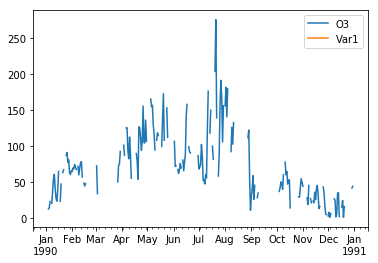

In [80]:
plt.figure();
ts.head(365).plot();

<Figure size 432x288 with 0 Axes>

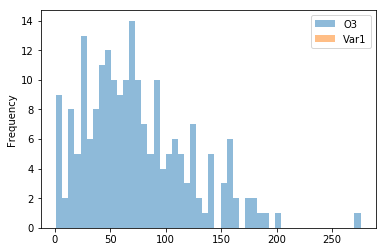

In [81]:
plt.figure();
ts.head(365).plot.hist(alpha=0.5, bins=50);

C:\Users\temp3rr0r\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\temp3rr0r\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 432x288 with 0 Axes>

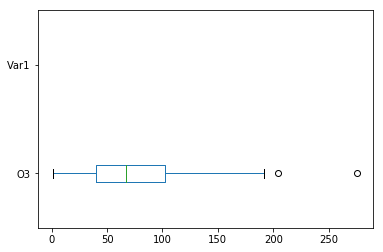

In [82]:
plt.figure();
ts.head(365).plot.box(vert=False);

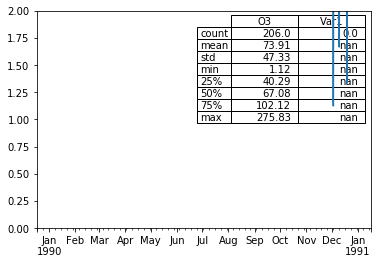

In [83]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1)

table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)

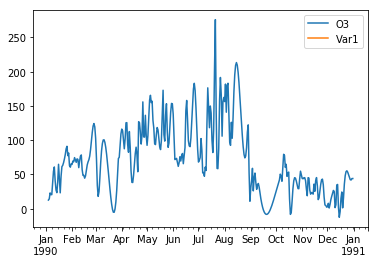

In [84]:
ts2 = ts.interpolate(method='cubic')
ts2.head(365).plot()

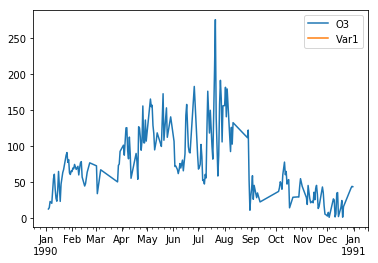

In [85]:
ts2 = ts.interpolate(method='linear')
ts2.head(365).plot()

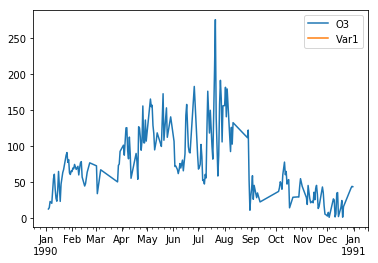

In [86]:
ts2 = ts.interpolate(method='time')
ts2.head(365).plot()

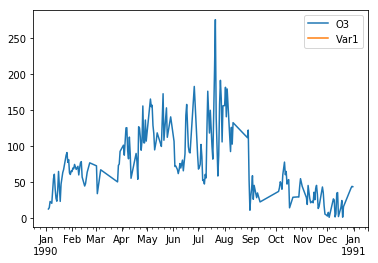

In [87]:
ts2 = ts.interpolate(method='from_derivatives')
ts2.head(365).plot()

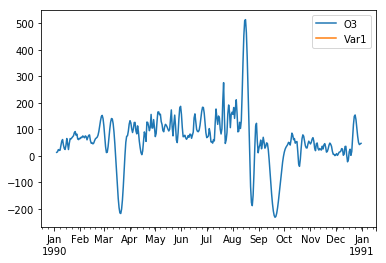

In [88]:
ts2 = ts.interpolate(method='spline',order=5)
ts2.head(365).plot()

PCHIP 1-d monotonic cubic interpolation.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator

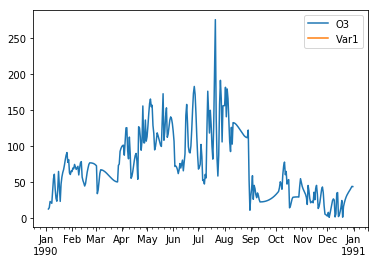

In [89]:
ts2 = ts.interpolate(method='pchip')
ts2.head(365).plot()

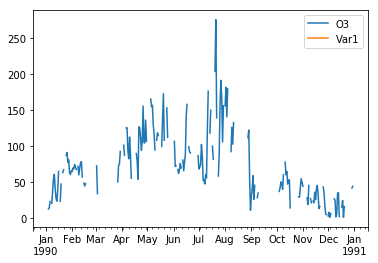

In [90]:
ts.head(365).plot()

# Meta-data for all O3 stations

In [1]:
# asdf
import xml.etree.ElementTree as ET
tree = ET.parse('BE_meta.xml')
root = tree.getroot()

In [2]:
root.tag

'airbase'

In [3]:
for child in root:
    print(child.tag, child.attrib)

country {}


In [4]:
# TODO: Ozone max8 
    # <measurement_configuration component = 'Ozone (air) - UV absorption'>
# TODO: PM10 Daily Average

for child in root:    
    for child1 in child:          
        if child1.tag == "station":
            if child1.attrib['Id']=="BETN073:43N073 - VEZIN":
                for child2 in child1:
                    if child2.tag == "measurement_configuration":
                        if child2.attrib['component'] == "Ozone (air) - UV absorption":
                            for child3 in child2:
                                if child3.tag == "statistics":
                                    if child3.attrib['Year'] == "2010":
                                        for child4 in child3:
                                            if child4.tag == "statistics_average_group":
                                                if child4.attrib['value'] == "day":
                                                    for child5 in child4:
                                                        if child5.tag == "statistic_set":
                                                            if child5.attrib['type'] == "General":
                                                                for child6 in child5:
#                                                                     print ("tag: {}, attrib: {}, text: {}".format(child5.tag, child5.attrib, child5.text))
                                                                    if child6.tag == "statistic_result":
                                                                        #<statistic_shortname>Max8
                                                                        print ("tag: {}, attrib: {}, text: {}".format(child6.tag, child6.attrib, child6.text))
                                                                        for child7 in child6:
                                                                            print ("tag: {}, attrib: {}, text: {}".format(child7.tag, child7.attrib, child7.text))
#                                                                             if child7.tag == "statistic_shortname" and child7.text == "Max8":
#                                                                                 for child8 in child7:
#                                                                                     print ("tag: {}, attrib: {}, text: {}".format(child8.tag, child8.attrib, child8.text))

tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: annual mean
tag: statistic_shortname, attrib: {}, text: Mean
tag: statistic_value, attrib: {}, text: 42.576
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: 50 percentile
tag: statistic_shortname, attrib: {}, text: P50
tag: statistic_value, attrib: {}, text: 42.646
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: 95 percentile
tag: statistic_shortname, attrib: {}, text: P95
tag: statistic_value, attrib: {}, text: 71.717
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: 98 percentile
tag: statistic_shortname, attrib: {}, text: P98
tag: statistic_value, attrib: {}, text: 86.812
tag: statistic_result, attrib: {}, text: 
								
tag: statistic_name, attrib: {}, text: maximum
tag: statistic_shortname, attrib: {}, text: Max
tag: statistic_value, attrib: {}, text: 103.688


In [146]:
for child in root:    
#     print(child.tag, child.attrib, child.text)
    for child1 in child:        
        print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))
        #for child2 in child1:
            #print(child2.tag, child2.attrib, child2.text)
            #print ("tag: {}, attrib: {}, text: {}".format(child2.tag, child2.attrib, child2.text))
            #for child3 in child2:
                #print(child2.tag, child2.attrib, child2.text)
                #print ("tag: {}, attrib: {}, text: {}".format(child3.tag, child3.attrib, child3.text))
                #for child4 in child3:
                    #print(child2.tag, child2.attrib, child2.text)
                    #print ("tag: {}, attrib: {}, text: {}".format(child4.tag, child4.attrib, child4.text))

tag: country_name, attrib: {}, text: BELGIUM
tag: country_iso_code, attrib: {}, text: BE
tag: country_eu_member, attrib: {}, text: Y
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: station, attrib: {'Id': 'BEMAT01:00AT01 - ANTWERPEN'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE01:00BE01 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE02:00BE02 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE06:00BE06 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE07:00BE07 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE08:00BE08 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE09:00BE09 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE10:00BE10 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE11:00BE11 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE15:00BE15 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMEK0

In [109]:
import re, collections
from lxml import etree

raw_tree = etree.parse("BE_meta.xml")
xml_root = tree.getroot()
xml = etree.tostring(tree.getroot())
  
xml_root = etree.fromstring(xml)
raw_tree = etree.ElementTree(xml_root)
nice_tree = collections.OrderedDict()
 
for tag in xml_root.iter():
    path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
    if path not in nice_tree:
        nice_tree[path] = []
    if len(tag.keys()) > 0:
        nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            
 
for path, attribs in nice_tree.items():
    indent = int(path.count('/') - 1)
    print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, path.split('/')[-1], ', '.join(attribs) if len(attribs) > 0 else '-'))

0: airbase [{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation]
    1: country [-]
        2: country_name [-]
        2: country_iso_code [-]
        2: country_eu_member [-]
        2: network [-]
            3: network_code [-]
            3: network_name [-]
            3: network_short_name [-]
            3: network_start_date [-]
            3: network_time_reference_basis [-]
            3: network_type [-]
            3: network_manager [-]
                4: organization [-]
                    5: organization_name [-]
                    5: organization_address [-]
                    5: organization_city [-]
                    5: organization_phone_number [-]
                    5: organization_fax_number [-]
                4: person [-]
                    5: person_last_name [-]
                    5: person_first_name [-]
        2: station [Id]
            3: station_european_code [-]
            3: network_info [-]
                4: network_code [-